### Importing Libraries

In [1]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from textblob import TextBlob

In [2]:
import warnings as wg
wg.filterwarnings("ignore")

In [3]:
%run ./key.ipynb

### Connecting to jump server of twitter

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_key_sec)

### Connecting jump server to web server of twitter

In [5]:
auth.set_access_token(access_token,access_token_sec)

### Connecting to API Strong Server of Twitter

In [6]:
api = tweepy.API(auth)

In [7]:
keyword = input("Keyword you need analysis on : ")

Keyword you need analysis on : nifty50


In [8]:
no_of_tweets = 1000
tweets = []
likes = []
time = []
for i in tweepy.Cursor( api.search_tweets,q=keyword, tweet_mode = "extended").items(no_of_tweets):
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)

In [9]:
df=pd.DataFrame({'tweets': tweets, 'likes':likes,'time':time})
df

,tweets,likes,time
0,#NIFTY50 \nFor nifty and banknifty daily level...,0,2022-07-14 04:39:19+00:00
1,Tchinical Analisys Update #14Jul2022 08:56\nSt...,0,2022-07-14 04:39:17+00:00
2,Tchinical Analisys Update #14Jul2022 08:56\nSt...,0,2022-07-14 04:38:16+00:00
3,Tchinical Analisys Update #14Jul2022 08:56\nSt...,0,2022-07-14 04:37:15+00:00
4,RT @EagleEyeReview: Tchinical Analisys Update ...,0,2022-07-14 04:36:55+00:00
...,...,...,...
995,US01Y US02Y #Yield inverted\n\n#MakeBubbleGrea...,0,2022-07-13 15:34:09+00:00
996,RT @KediaCapital: #MarketUpdate: 13th July 202...,0,2022-07-13 15:32:55+00:00
997,RT @iamamitvasu: @Himani_taneja13 Nasdaq green...,0,2022-07-13 15:28:54+00:00
998,RT @TheNxtBigTrader: #Day8 Takeaways👇\n1.Adequ...,0,2022-07-13 15:26:10+00:00


### Cleaning tweets

In [10]:
def cleanTxt(text):
    text = re.sub(r"@[A-Za-z0-9]+" , '', text)        #remove @mentions
    text = re.sub(r'#', '', text)                     #removing "#" symbol
    text = re.sub(r'RT[\s]+', '', text)               # removing RT(retweets)
    text = re.sub(r'https?:\/\/\S+', '', text)        # remove the hyper link
    return text
df["tweets"]=df["tweets"].apply(cleanTxt)
df

,tweets,likes,time
0,NIFTY50 \nFor nifty and banknifty daily level ...,0,2022-07-14 04:39:19+00:00
1,Tchinical Analisys Update 14Jul2022 08:56\nSto...,0,2022-07-14 04:39:17+00:00
2,Tchinical Analisys Update 14Jul2022 08:56\nSto...,0,2022-07-14 04:38:16+00:00
3,Tchinical Analisys Update 14Jul2022 08:56\nSto...,0,2022-07-14 04:37:15+00:00
4,: Tchinical Analisys Update 14Jul2022 08:56\nS...,0,2022-07-14 04:36:55+00:00
...,...,...,...
995,US01Y US02Y Yield inverted\n\nMakeBubbleGreatA...,0,2022-07-13 15:34:09+00:00
996,": MarketUpdate: 13th July 2022\n\nSource: NSE,...",0,2022-07-13 15:32:55+00:00
997,": _taneja13 Nasdaq green, US VIX flat....no pa...",0,2022-07-13 15:28:54+00:00
998,: Day8 Takeaways👇\n1.Adequate capital is requi...,0,2022-07-13 15:26:10+00:00


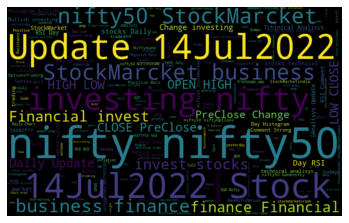

In [11]:
#Plot The Word Cloud
allWords = ' '.join([twts for twts in df['tweets']])
wordCloud = WordCloud(width=800,height=500,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

### Creating a function to get subjectivity

In [12]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity             

### Creating  a function to get the polarity

In [13]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

##### Creating two new columns for getting subjectivity and polarity

In [14]:
df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity'] = df['tweets'].apply(getPolarity)
df

,tweets,likes,time,Subjectivity,Polarity
0,NIFTY50 \nFor nifty and banknifty daily level ...,0,2022-07-14 04:39:19+00:00,0.250000,0.068182
1,Tchinical Analisys Update 14Jul2022 08:56\nSto...,0,2022-07-14 04:39:17+00:00,0.344697,0.165152
2,Tchinical Analisys Update 14Jul2022 08:56\nSto...,0,2022-07-14 04:38:16+00:00,0.344697,0.165152
3,Tchinical Analisys Update 14Jul2022 08:56\nSto...,0,2022-07-14 04:37:15+00:00,0.344697,0.165152
4,: Tchinical Analisys Update 14Jul2022 08:56\nS...,0,2022-07-14 04:36:55+00:00,0.639394,0.330303
...,...,...,...,...,...
995,US01Y US02Y Yield inverted\n\nMakeBubbleGreatA...,0,2022-07-13 15:34:09+00:00,0.000000,0.000000
996,": MarketUpdate: 13th July 2022\n\nSource: NSE,...",0,2022-07-13 15:32:55+00:00,0.000000,0.000000
997,": _taneja13 Nasdaq green, US VIX flat....no pa...",0,2022-07-13 15:28:54+00:00,0.300000,-0.200000
998,: Day8 Takeaways👇\n1.Adequate capital is requi...,0,2022-07-13 15:26:10+00:00,0.000000,0.000000


### Creating  a function to compute the positive , negative and neutral analysis

In [15]:
def getAnalysis(score):
    if score>0:
        return 'Positive'
    elif score == 0 :
        return 'Neutral'
    else:
        return 'Negative'
df['Analysis']= df['Polarity'].apply(getAnalysis)
df

,tweets,likes,time,Subjectivity,Polarity,Analysis
0,NIFTY50 \nFor nifty and banknifty daily level ...,0,2022-07-14 04:39:19+00:00,0.250000,0.068182,Positive
1,Tchinical Analisys Update 14Jul2022 08:56\nSto...,0,2022-07-14 04:39:17+00:00,0.344697,0.165152,Positive
2,Tchinical Analisys Update 14Jul2022 08:56\nSto...,0,2022-07-14 04:38:16+00:00,0.344697,0.165152,Positive
3,Tchinical Analisys Update 14Jul2022 08:56\nSto...,0,2022-07-14 04:37:15+00:00,0.344697,0.165152,Positive
4,: Tchinical Analisys Update 14Jul2022 08:56\nS...,0,2022-07-14 04:36:55+00:00,0.639394,0.330303,Positive
...,...,...,...,...,...,...
995,US01Y US02Y Yield inverted\n\nMakeBubbleGreatA...,0,2022-07-13 15:34:09+00:00,0.000000,0.000000,Neutral
996,": MarketUpdate: 13th July 2022\n\nSource: NSE,...",0,2022-07-13 15:32:55+00:00,0.000000,0.000000,Neutral
997,": _taneja13 Nasdaq green, US VIX flat....no pa...",0,2022-07-13 15:28:54+00:00,0.300000,-0.200000,Negative
998,: Day8 Takeaways👇\n1.Adequate capital is requi...,0,2022-07-13 15:26:10+00:00,0.000000,0.000000,Neutral


### Ploting the polarity and subjectivity

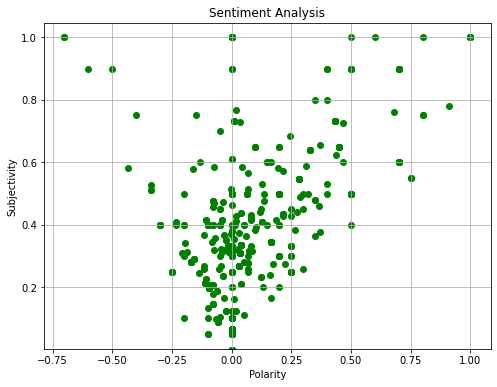

In [17]:
plt.figure(figsize=(8,6))
for i in range (0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color = 'Green')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid()
plt.show()

### Showing the value count

In [18]:
df['Analysis'].value_counts()

Positive    489
Neutral     376
Negative    135
Name: Analysis, dtype: int64

### Ploting and Visualizing the value count

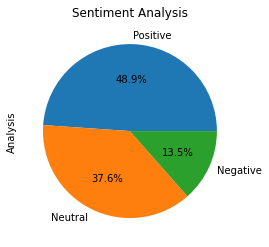

In [19]:
plt.title('Sentiment Analysis')
df['Analysis'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()